### 1. Importação de Bibliotecas Utilizadas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

### 2. Leitura e Junção dos Datasets

In [3]:
#Leitura dos dados
movies = pd.read_csv('movies.csv', sep = ';')
ratings = pd.read_csv('ratings.csv', sep = ';')
users = pd.read_csv('users.csv', sep = ',')

#Junção dos dados por MovieID e UserID
data = pd.merge(ratings, movies, on='MovieID', how='left')
data = pd.merge(data, users, on='UserID', how='left')

In [4]:
data

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Occupation,Zip-code,name,birthday
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,10,48067,Isla Johnson,4/1/2012
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,10,48067,Isla Johnson,4/1/2012
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,10,48067,Isla Johnson,4/1/2012
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,10,48067,Isla Johnson,4/1/2012
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,10,48067,Isla Johnson,4/1/2012
...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy,M,6,11106,John Evans,4/8/1988
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War,M,6,11106,John Evans,4/8/1988
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama,M,6,11106,John Evans,4/8/1988
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama,M,6,11106,John Evans,4/8/1988


### 3. Tratamento das Features

In [5]:
#Análise de dados faltantes
data.isna().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
Gender        0
Occupation    0
Zip-code      0
name          0
birthday      0
dtype: int64

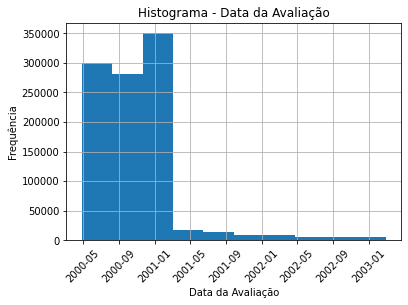

In [6]:
# 1 - Tratamento: Data da Avaliação - Data do Filme = Idade do filme no dia da avaliação

# 1.1 - Histograma da Data da Avaliação
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

pd.to_datetime(data['Timestamp'], unit='s').hist(bins = 10, ax=axes)
plt.title('Histograma - Data da Avaliação')
plt.xticks(rotation=45)
plt.xlabel('Data da Avaliação')
plt.ylabel('Frequência')
plt.show();

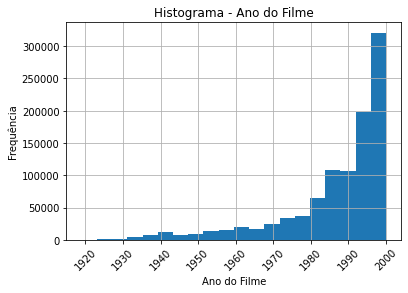

In [7]:
# 1.2 - Extração do ano do filme

data['year_movie'] = pd.to_datetime(data['Title'].apply(lambda x: x[-5:-1]))
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

data['year_movie'].hist(bins = 20, ax=axes)
plt.title('Histograma - Ano do Filme')
plt.xticks(rotation=45)
plt.xlabel('Ano do Filme')
plt.ylabel('Frequência')
plt.show();

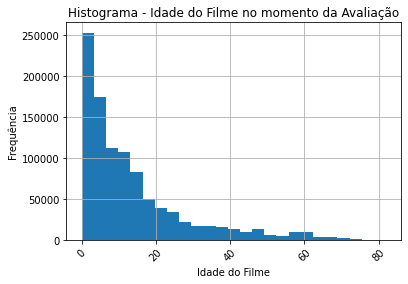

In [8]:
# 1.3 - Diferença entre o ano da avaliação e o ano de lançamento do filme
data['movie_age_on_rank'] = (pd.to_datetime(data['Timestamp'], unit='s').dt.year - pd.to_datetime(data['Title'].apply(lambda x: x[-5:-1])).dt.year).astype(int)

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

data['movie_age_on_rank'].hist(bins = 25, ax=axes)
plt.title('Histograma - Idade do Filme no momento da Avaliação')
plt.xticks(rotation=45)
plt.xlabel('Idade do Filme')
plt.ylabel('Frequência')
plt.show();

In [9]:
# 1.4 Transformação da idade do filme em atributo categórico

bins = [-1, 1, 3, 6, 10, 15, 30, np.inf]
labels = ['[0, 1]', '[2, 3]', '[4, 6]', '[7, 10]', '[11, 15]', '[16, 30]', '[31, ...)']
data['cat_movie_age'] = pd.cut(data['movie_age_on_rank'], bins = bins, labels = labels)

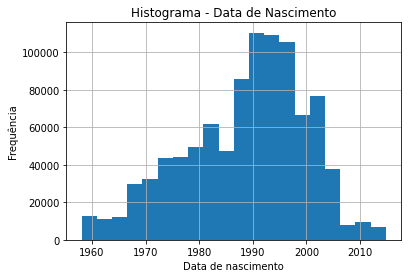

In [10]:
# 2 - Tratamento: Idade do usuário (considerando 2022 como referência)

#2.1 - Histograma da Data de nascimento do usuário
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

pd.to_datetime(data['birthday'], format="%m/%d/%Y", errors = "coerce").hist(bins = 20, ax=axes)
plt.title('Histograma - Data de Nascimento')
plt.xlabel('Data de nascimento')
plt.ylabel('Frequência')
plt.show();

In [11]:
# 2.2 Análise de inconsistência no atributo birthday

data['day_birthday'] = data['birthday'].apply(lambda x: int(str(x).split("/")[1]))
data['month_birthday'] = data['birthday'].apply(lambda x: int(str(x).split("/")[0]))
data['year_birthday'] = data['birthday'].apply(lambda x: int(str(x).split("/")[2]))

# Problemas: Os dias foram gerados considerando zero como base.

print('Dias:\n',
      'Dia mínimo:', data['day_birthday'].min(), '/',
      'Dia máximo:', data['day_birthday'].max())

print('Meses:\n',
      'Mês mínimo:', data['month_birthday'].min(), '/',
      'Mês máximo:', data['month_birthday'].max())

print('Anos:\n',
      'Ano mínimo:', data['year_birthday'].min(), '/',
      'Ano máximo:', data['year_birthday'].max())

# Correção: Adicionou-se 1 à data de nascimento de todos que nasceram no "dia zero" 

data['day_birthday'] = data['day_birthday'].replace(0,1)

print('Dias Corrigidos:\n',
      'Dia mínimo:', data['day_birthday'].min(), '/',
      'Dia máximo:', data['day_birthday'].max())

data['fixed_birthday'] = data['day_birthday'].astype(str) + '/' +\
                         data['month_birthday'].astype(str) + '/' +\
                                data['year_birthday'].astype(str)

data = data.drop(['day_birthday','month_birthday','year_birthday'], axis = 1)

Dias:
 Dia mínimo: 0 / Dia máximo: 28
Meses:
 Mês mínimo: 1 / Mês máximo: 11
Anos:
 Ano mínimo: 1958 / Ano máximo: 2014
Dias Corrigidos:
 Dia mínimo: 1 / Dia máximo: 28


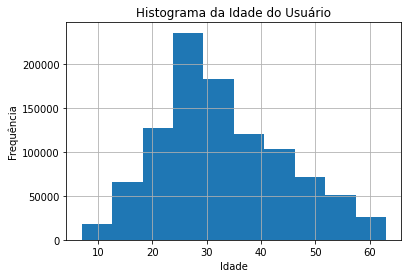

In [12]:
# 2.2 - Histograma da idade do usuário em 01/01/2022

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

data['user_age'] = ((pd.to_datetime('2022') - pd.to_datetime(data['fixed_birthday'], format="%d/%m/%Y"))/timedelta(days=365)).astype(int)
data['user_age'].hist(bins = 10, ax=axes)
plt.title('Histograma da Idade do Usuário')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.plot();

In [13]:
# 2.3 Transformação da idade do usuário em atributo categórico

bins = [-1, 17, 24, 34, 44, 49, 55, np.inf]
labels = ['[0, 17]', '[18, 24]', '[25, 34]', '[35, 44]', '[45, 49]', '[50, 55]', '[56, ...)']
data['cat_user_age'] = pd.cut(data['user_age'], bins = bins, labels = labels)

In [14]:
# 3 - Tratamento: Pivoteando Gêneros, ou seja, criando uma coluna por gênero e atribuindo 1 se o filme pertence àquele gênero.
list_genres = [
                'Action',
                'Adventure',
                'Animation',
                'Children\'s',
                'Comedy',
                'Crime',
                'Documentary',
                'Drama',
                'Fantasy',
                'Film-Noir',
                'Horror',
                'Musical',
                'Mystery',
                'Romance',
                'Sci-Fi',
                'Thriller',
                'War',
                'Western'
            ]

def pivot_genres(x):
    values = [0]*len(list_genres)
    for ind in [list_genres.index(genre) for genre in x]:
        values[ind] = 1
    return pd.Series(values, index=list_genres)

data[list_genres] = data['Genres'].str.split('|').apply(pivot_genres)

In [15]:
# 4 - Trazendo a descrição da ocupação
dict_occupation = {
                    0:  "other",
                    1:  "academic/educator",
                    2:  "artist",
                    3:  "clerical/admin",
                    4:  "college/grad student",
                    5:  "customer service",
                    6:  "doctor/health care",
                    7:  "executive/managerial",
                    8:  "farmer",
                    9:  "homemaker",
                    10:  "K-12 student",
                    11:  "lawyer",
                    12:  "programmer",
                    13:  "retired",
                    14:  "sales/marketing",
                    15:  "scientist",
                    16:  "self-employed",
                    17:  "technician/engineer",
                    18:  "tradesman/craftsman",
                    19:  "unemployed",
                    20:  "writer"
                }
data['Occupation'] = data['Occupation'].apply(lambda x: dict_occupation[x])

### Zip Code - Description
![Zip Code Description](imagens/zipcode_desc.png "Zip Code")


### Zip Code - Map
![Zip Code Map](imagens/zipcode.png "Zip Code Map")

In [16]:
# 5 - Extraindo Macro Área (National Area) do Zip Code
data['National Area'] = data['Zip-code'].str[0]

### 4. Features Usadas no Modelo

In [17]:
cols = ['Gender', 'Occupation', 'cat_user_age','cat_movie_age','National Area',
       'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

X = data[cols]
y = data[['Rating']]

In [18]:
resume = pd.DataFrame(y.value_counts())
resume.columns = ['Quantidade']
resume['Quantidade(%)'] = round(100*resume['Quantidade']/resume['Quantidade'].sum(),1)
resume

,Quantidade,Quantidade(%)
Rating,,
4,348971,34.9
3,261197,26.1
5,226310,22.6
2,107557,10.8
1,56174,5.6


In [19]:
categorical_columns = ['Gender', 'Occupation', 'cat_user_age', 'cat_movie_age', 'National Area']
for column in categorical_columns:
    df = pd.get_dummies(X[column], prefix=column)
    X = pd.merge(
        left=X,
        right=df,
        left_index=True,
        right_index=True,
    )
    X = X.drop(columns=column)

### 5. Separação de Grupo de Teste

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1)

### 6. ID3

A entropia pode ser cálculada como,
$$
    H(S) = \sum_{i=1}^{N}-p_i\log_2 p_i
$$

onde $p_i$ é a proporção de cada categoria $i=1,\dots,n$

O ganho de informação é um conceito baseado na entropia. 

É definido como a entropia total menos a entropia se escolhermos uma feature particular j:

$$
G(S,j) = H(S) - \sum_{j}\frac{|S_j|}{|S|}H(S_j)
$$ 

*Obs.: o ID3 foi implementado no arquivo id3.py 

In [21]:
from id3 import ID3Classifier

### 7. Treino

In [22]:
model = ID3Classifier()
model.fit(X_train, y_train)

### 8. Avaliação

In [23]:
predictions = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


C:\Users\pedro\AppData\Local\Temp/ipykernel_9836/1066562039.py:20: RuntimeWarning: invalid value encountered in true_divide
  P = TP/(TP+FP)


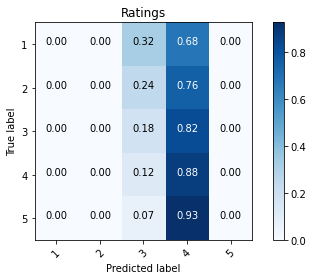

In [25]:
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1, 2, 3, 4 ,5],
                      title='Ratings', normalize = True)
                      
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Recall
R = TP/(TP+FN)
# Precision 
P = TP/(TP+FP)
# Accuracy 
ACC = (TP+TN)/(TP+FP+FN+TN)

In [26]:
R

array([1.74e-03, 0.00e+00, 1.75e-01, 8.80e-01, 8.81e-05])

In [27]:
P

array([0.45,  nan, 0.31, 0.36, 0.67])

In [28]:
ACC

array([0.94, 0.89, 0.68, 0.41, 0.77])

In [29]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, predictions)

0.025792345425804775

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

1.3039661671049079

### 9. Classificador a priori

In [31]:
mask_train = X_train.index.to_list()
mask_test  = X_test.index.to_list()

df_train = data.loc[mask_train]
df_test  = data.loc[mask_test]

In [32]:
# Dicionário Filme -> Nota média truncada
df_dict = data.groupby('Title').agg({'Rating':'mean'}).astype(int)

In [33]:
def pred_class_apriori(df):
    return df['Title'].apply(lambda x: df_dict.loc[x][0]).values

In [34]:
predictions_apriori = pred_class_apriori(df_test)

Normalized confusion matrix


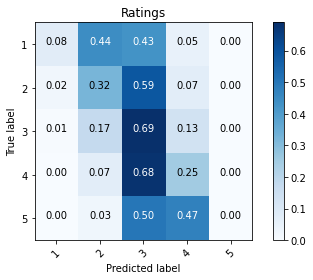

In [35]:
cnf_matrix = confusion_matrix(y_test, predictions_apriori)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1, 2, 3, 4 ,5],
                      title='Ratings', normalize = True);

In [36]:
cnf_matrix = confusion_matrix(y_test, predictions_apriori)
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Recall
R = TP/(TP+FN)
# Precision 
P = TP/(TP+FP)
# Accuracy 
ACC = (TP+TN)/(TP+FP+FN+TN)

In [37]:
R

array([7.64e-02, 3.20e-01, 6.89e-01, 2.48e-01, 4.41e-05])

In [38]:
P

array([0.51, 0.25, 0.29, 0.36, 1.  ])

In [39]:
ACC

array([0.94, 0.83, 0.48, 0.59, 0.77])

In [40]:
cohen_kappa_score(y_test, predictions_apriori)

0.06139069983863055

In [41]:
mean_squared_error(y_test, predictions_apriori)

1.2877195788884335